In [1]:
from keras.optimizers import RMSprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, random, cv2
from scipy.spatial import distance
from keras import Sequential
from keras.layers import Flatten, Dense, Conv2D, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.applications import EfficientNetB1, VGG19, ResNet50, InceptionV3, MobileNet, DenseNet201
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/SpringBoard/Sample Projects/Image Classification/face mask dataset"

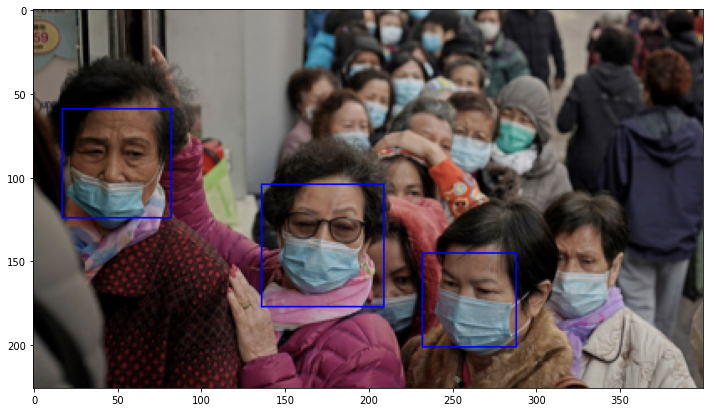

In [4]:
face_model = cv2.CascadeClassifier(path + '/haarcascade/haarcascade_frontalface_default.xml')

# Sample image
#image = random.choice(os.listdir(path + '/images'))

img = cv2.imread(path+ '/images/' + 'maksssksksss431.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4)

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Creating box around potential face
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

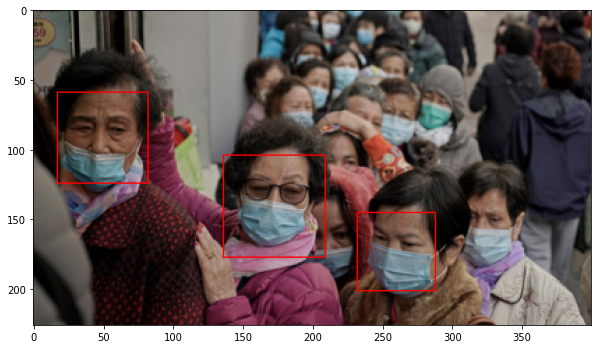

In [5]:
MIN_DISTANCE = 150

if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

# Comparison 
- ConvNet
- InceptionV3
- MobileNet
- DenseNet
- VGG19

In [ ]:
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=batch_size, class_mode='categorical')

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
model_histories = []
shape = (128, 128, 3)
models = [InceptionV3(include_top=False, input_shape=shape), MobileNet(include_top=False, input_shape=shape), DenseNet201(include_top=False, input_shape=shape), VGG19(include_top=False, input_shape=shape)]

model_names = ['ConvNet', 'InceptionV3', 'MobileNet', 'DenseNet', 'VGG19']

for layer in [Conv2D(32, (3, 3), activation='relu', input_shape=shape)]:
    model = Sequential()
    model.add(layer)
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(2, activation='sigmoid'))
    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

    model_histories.append(model.fit(train_generator, validation_data=test_generator, steps_per_epoch=len(train_generator)//3, validation_steps=len(test_generator)//3, epochs=10))

for functional in models:
    
    for layer in functional.layers:
        layer.trainable = False

    model = Sequential()
    model.add(functional)
    model.add(Flatten())
    model.add(Dense(2, activation='sigmoid'))
    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
    model_histories.append(model.fit_generator(generator=train_generator, validation_data=test_generator, steps_per_epoch=len(train_generator)//3, validation_steps=len(test_generator)//3, epochs=10))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_94 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 254018    
Total params: 255,042
Trainable params: 254,978
Non-trainable params: 64
_________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
208/208 [==============================] - 128s 589ms/step - loss: 0.1622 - accuracy: 0.9484 - val_loss: 0.0446 - val_accuracy: 0.9844
Epoch 2/10
208/208 [==============================] - 121s 580ms/step - loss: 0.0567 - accuracy: 0.9863 - val_loss: 0.0550 - val_accuracy: 0.9906
Epoch 3/10
208/208 [==============================] - 121s 580ms/step - loss: 0.0654 - accuracy: 0.9857 - val_loss: 0.0186 - val_accuracy: 0.9937
Epoch 4/10
208/208 [==============================] - 121s 579ms/step - loss: 0.0440 - accuracy: 0.9921 - val_loss: 0.1058 - val_accuracy: 0.9906
Epoch 5/10
208/208 [==============================] - 121s 580ms/step - loss: 0.0550 - accuracy: 0.9904 - val_loss: 0.0276 - val_accuracy: 0.9906
Epoch 6/10
208/208 [==============================] - 121s 581ms/step - loss: 0.0192 - accuracy: 0.9961 - val_loss: 0.0212 - val_accuracy: 0.9937
Epoch 7/10
208/208 [==============================] - 131s 629ms/step - loss: 0.0980 - accuracy: 0.9878 - val_loss: 0.0562 -

In [13]:
# Accuracy and Loss Visual
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5))

    # Accuracy history
    axs[0].plot(history.history['accuracy']) 
    #axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='best')
    
    # Loss history
    axs[1].plot(history.history['loss']) 
    #axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='best')
    plt.show()

In [ ]:
import pandas as pd
for history in model_histories:
  for i in model_names:
    print(i + pd.DataFrame(model.history.history))

ConvNet
       loss  accuracy  val_loss  val_accuracy
0  0.160002  0.945312  0.102764      0.962500
1  0.071960  0.977163  0.031473      0.987500
2  0.046847  0.983774  0.034810      0.987500
3  0.045603  0.984375  0.044300      0.984375
4  0.040981  0.986478  0.022088      0.993750
5  0.035988  0.988882  0.019089      0.993750
6  0.026339  0.991887  0.021620      0.990625
7  0.034200  0.987981  0.017571      0.990625
8  0.031017  0.990986  0.015654      0.996875
9  0.022128  0.992488  0.024204      0.993750
InceptionV3
       loss  accuracy  val_loss  val_accuracy
0  0.160002  0.945312  0.102764      0.962500
1  0.071960  0.977163  0.031473      0.987500
2  0.046847  0.983774  0.034810      0.987500
3  0.045603  0.984375  0.044300      0.984375
4  0.040981  0.986478  0.022088      0.993750
5  0.035988  0.988882  0.019089      0.993750
6  0.026339  0.991887  0.021620      0.990625
7  0.034200  0.987981  0.017571      0.990625
8  0.031017  0.990986  0.015654      0.996875
9  0.022128  0

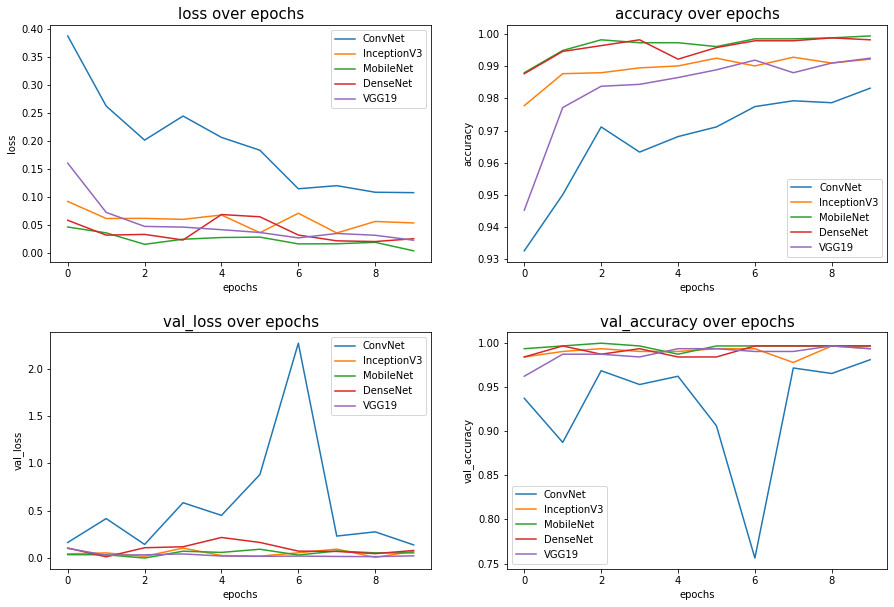

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)
for metric in model_histories[0].history:
    index = list(model_histories[0].history).index(metric)
    ax = axes.flatten()[index]
    name_index = 0
    for history in model_histories:
        ax.plot(history.history[metric], label=model_names[name_index])
        name_index += 1
    ax.set_title(metric+' over epochs', size=15)
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.legend()
plt.show()

# VGG19

In [6]:
train_dir = path + '/12k/Train'
test_dir = path + '/12k/Test'
val_dir = path + '/12k/Validation'

In [7]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(128,128), class_mode='categorical', batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir, target_size=(128,128), class_mode='categorical', batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=test_dir, target_size=(128,128), class_mode='categorical', batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [8]:
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()

model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics ="accuracy")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 16386     
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [9]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator)//32, epochs=20, validation_data=val_generator, validation_steps=len(val_generator)//32)

Epoch 1/20
9/9 [==============================] - 48s 5s/step - loss: 0.5749 - accuracy: 0.6661
Epoch 2/20
9/9 [==============================] - 37s 4s/step - loss: 0.2758 - accuracy: 0.8635
Epoch 3/20
9/9 [==============================] - 36s 4s/step - loss: 0.2075 - accuracy: 0.9166
Epoch 4/20
9/9 [==============================] - 35s 4s/step - loss: 0.1642 - accuracy: 0.9470
Epoch 5/20
9/9 [==============================] - 38s 4s/step - loss: 0.0989 - accuracy: 0.9611
Epoch 6/20
9/9 [==============================] - 37s 4s/step - loss: 0.1267 - accuracy: 0.9590
Epoch 7/20
9/9 [==============================] - 36s 4s/step - loss: 0.0892 - accuracy: 0.9612
Epoch 8/20
9/9 [==============================] - 26s 3s/step - loss: 0.0821 - accuracy: 0.9819
Epoch 9/20
9/9 [==============================] - 33s 4s/step - loss: 0.0760 - accuracy: 0.9808
Epoch 10/20
9/9 [==============================] - 28s 3s/step - loss: 0.0628 - accuracy: 0.9827
Epoch 11/20
9/9 [======================

In [10]:
pd.DataFrame(model.history.history)

,loss,accuracy
0,0.468853,0.756944
1,0.254717,0.888889
2,0.183229,0.934028
3,0.144681,0.954861
4,0.089908,0.965278
5,0.111346,0.972222
6,0.091645,0.965278
7,0.078161,0.977941
8,0.075629,0.979167
9,0.060407,0.989583


In [11]:
# Accuracy of test data
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

31/31 [==============================] - 6s 191ms/step - loss: 0.0587 - accuracy: 0.9758
Test loss: 0.05872636288404465
Test accuracy: 0.975806474685669


In [12]:
model.save('facemask_model.h5')

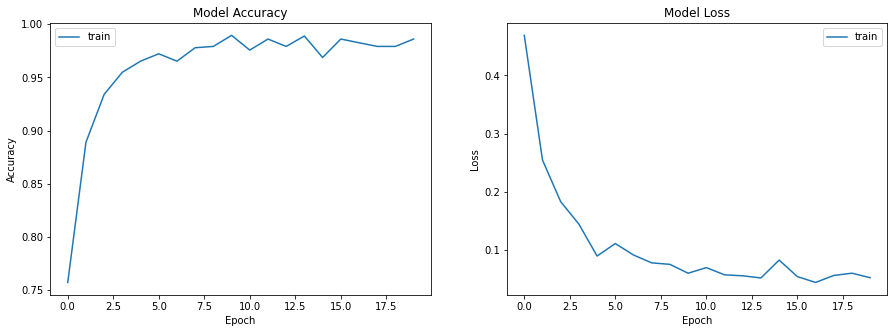

In [14]:
plotmodelhistory(history)

In [15]:
# Prediction
predictions = model.predict(test_generator)

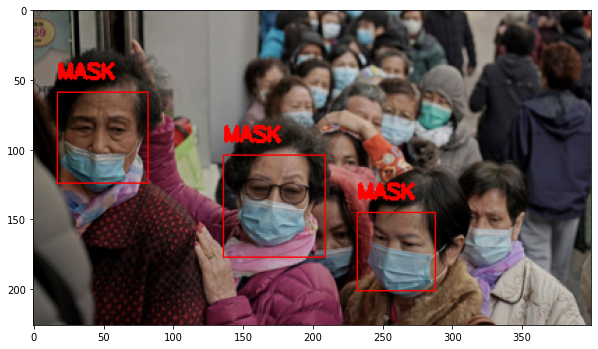

In [21]:
# Integrating Haarcascade
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")
# Red color shows that the social distance rule has been violated